<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)  #.6 proporción para desaturar el color.
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

## Normalizar para las columnas numéricas con procesamiento Standard Scaler

In [4]:
#identificar tipo de Datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Del análisis se desprende que:
* id corresponde a la identidad del paciente, por ende es eliminada la variable.
* el dato acerca del diagnostico es binario, está variable no es escalada y corresponde al valor objetivo

In [18]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
## Normalizar para las columnas numéricas con procesamiento StandardScaler
from sklearn.compose import ColumnTransformer
datos_numericos=df.select_dtypes(include=['float64']).columns.to_list()

#datos_numericos
scaler=StandardScaler()
scaler.fit_transform(df[datos_numericos])
a=scaler.transform(df[datos_numericos])
#Volver a asignar nombre a Datos
datos = pd.DataFrame(a, columns=datos_numericos)


## 2.Realice un gráfico de correlación. Identifique la existencia de colinealidad.

###### Habilitando como código esta celda, se observan todas las correlaciones de gráfico. Queda desactiva por un tema de recursos consumidos por el computador.

sns.pairplot(datos, diag_kind=None)

* En tal caso se usa un mapa de calor por darnos una visión más amplia ante el análisis de 30 variables de entrada.

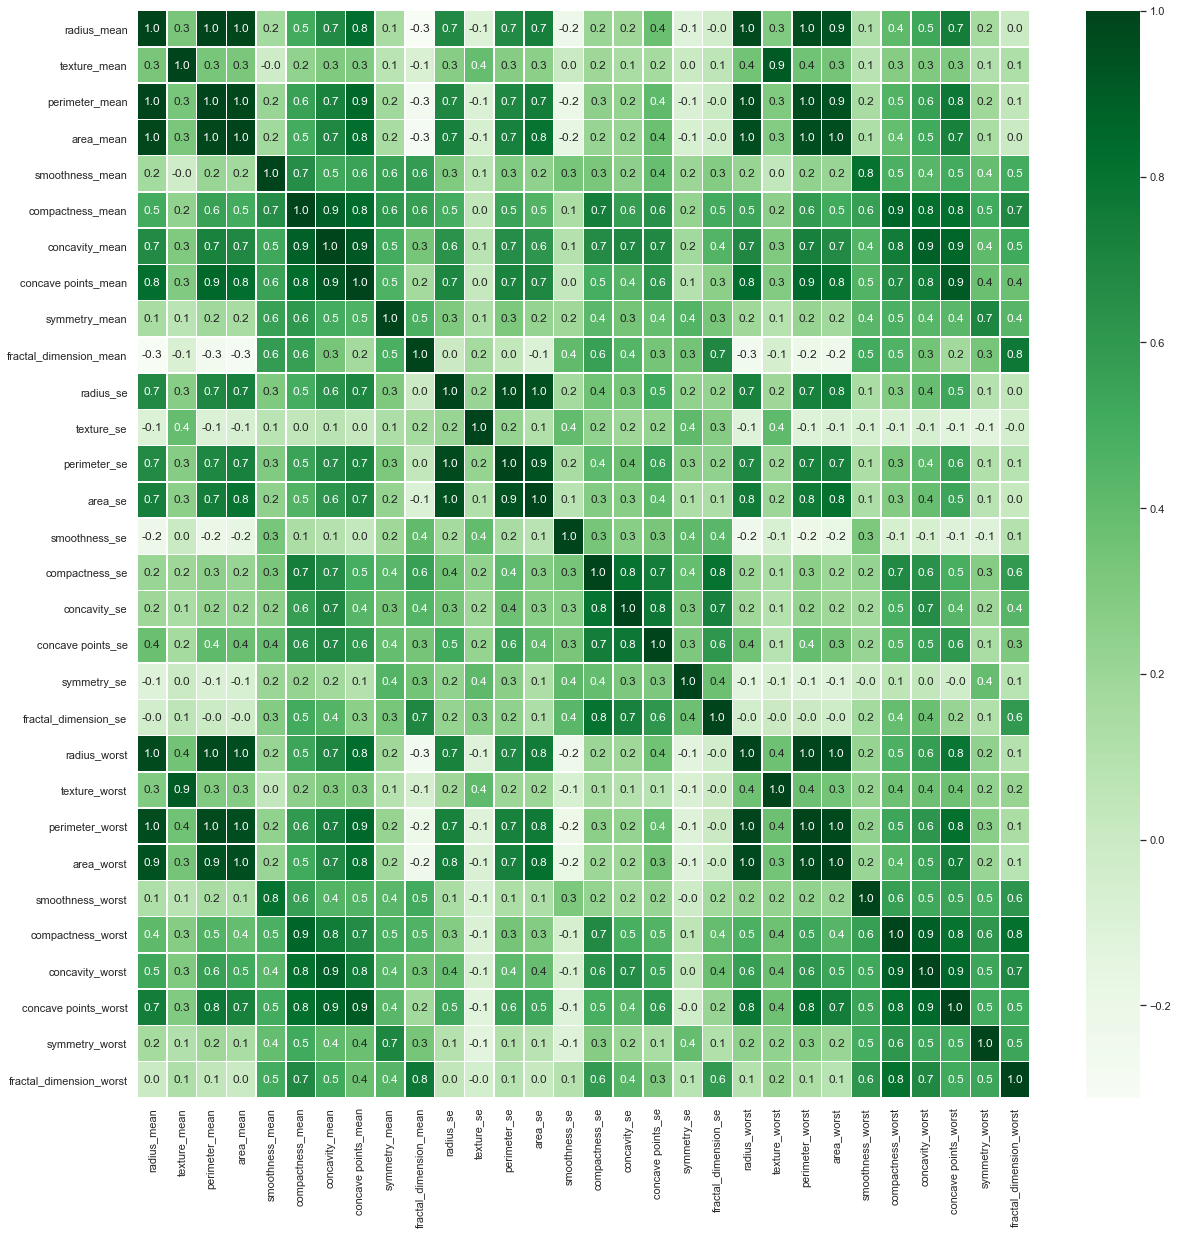

In [20]:
import seaborn as sns
ig,ax=plt.subplots(figsize=(20, 20))
corr = datos.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,
            annot=True,fmt=".1f",cmap='Greens',linewidths=.5)
plt.show()


In [27]:
#Para analizar las variables que tienen mayor correlación entre ellas se seleccionan solamente las que poseen una
#correlación superior a 0.8
a=(corr)>=0.8
corr[a].fillna('')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1,,0.997855,0.987357,,,,0.822529,,,...,0.969539,,0.965137,0.941082,,,,,,
texture_mean,,1,,,,,,,,,...,,0.912045,,,,,,,,
perimeter_mean,0.997855,,1,0.986507,,,,0.850977,,,...,0.969476,,0.970387,0.94155,,,,,,
area_mean,0.987357,,0.986507,1,,,,0.823269,,,...,0.962746,,0.95912,0.959213,,,,,,
smoothness_mean,,,,,1,,,,,,...,,,,,0.805324,,,,,
compactness_mean,,,,,,1,0.883121,0.831135,,,...,,,,,,0.865809,0.816275,0.815573,,
concavity_mean,,,,,,0.883121,1,0.921391,,,...,,,,,,,0.884103,0.861323,,
concave points_mean,0.822529,,0.850977,0.823269,,0.831135,0.921391,1,,,...,0.830318,,0.855923,0.80963,,,,0.910155,,
symmetry_mean,,,,,,,,,1,,...,,,,,,,,,,
fractal_dimension_mean,,,,,,,,,,1,...,,,,,,,,,,


## Realizar un ajuste PCA con n_components = 10. Realice un gráfico de la varianza y varianza acumulada. Interprete.

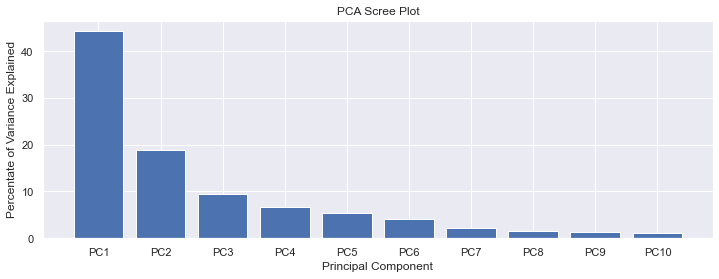

In [9]:
# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(datos)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

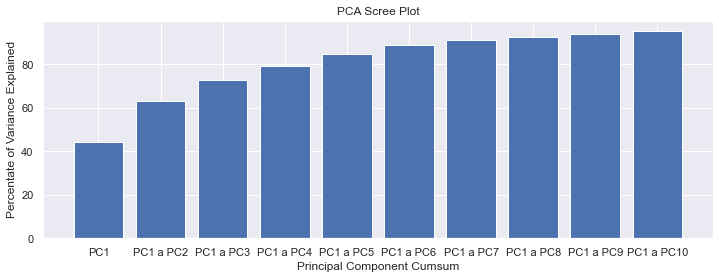

In [10]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1 a PC2', 'PC1 a PC3', 'PC1 a PC4','PC1 a PC5','PC1 a PC6','PC1 a PC7','PC1 a PC8','PC1 a PC9','PC1 a PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

## Devuelva un dataframe con las componentes principales.

In [11]:
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(datos)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
targetDataframe = df[['diagnosis']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head(100)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159366,-0.398401,-0.157107,-0.877425,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240986,-0.711909,1.107004,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541453,-0.668162,0.097369,0.024057,0.454290,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053423,1.429921,1.059552,-1.405463,-1.116931,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636377,-0.263805,0.377704,1
...,...,...,...,...,...,...,...,...,...,...,...
95,4.396228,-2.123508,0.579510,-0.777413,-0.303834,1.785125,0.000424,0.292765,-0.580880,0.499601,1
96,-2.592083,0.213634,1.035612,0.662005,-0.540764,-0.096938,-0.022544,-1.597704,0.179586,0.410324,0
97,-3.904338,1.190067,1.551981,-0.935775,-0.708120,-2.354004,1.116764,-0.148581,-0.907408,-0.316796,0
98,-2.818231,0.367884,-1.351436,1.738415,0.284321,-0.431282,0.484929,0.290943,0.057329,-0.382815,0


## 5.Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [12]:
metricas = pd.DataFrame([],columns = ['acuracy','recall','precision','modelo'])

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
import warnings
warnings.filterwarnings('ignore')


names = ["Logistic", 
         "Decision Tree", 
         "Random Forest"
]
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

X=newDataframe.drop(['diagnosis'],axis=1)
y=newDataframe['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)
    

# iterate over classifiers
metricas = pd.DataFrame([],columns = ['acuracy','recall','precision','f1','modelo'])
#df = pd.DataFrame([], columns = ['acuracy','recall','precision','modelo'])
for name, clf in zip(names, classifiers):
    modelo=clf.fit(X_train, y_train)
    acuracy=accuracy_score(y_test,modelo.predict(X_test))
    recall=recall_score(y_test,modelo.predict(X_test))
    precision=precision_score(y_test,modelo.predict(X_test))
    f1=f1_score(y_test,modelo.predict(X_test))
    metricas=metricas.append({'acuracy': acuracy, 'recall': recall,
                                            'precision':precision, 'f1':f1,
                                            'modelo':name},ignore_index=True)

metricas.head()
    
        

,acuracy,recall,precision,f1,modelo
0,0.976608,0.981481,0.946429,0.963636,Logistic
1,0.906433,0.962963,0.787879,0.866667,Decision Tree
2,0.935673,0.962963,0.852459,0.904348,Random Forest


* En este caso el modelo de regresión logistica resulto más apropiado para el análisis de los datos. Siendo superior
  en todas las métricas.
* En segundo lugar, Random Forest y luego Decision Tree.